In [1]:
from google.colab import files
#Uploading data
uploaded = files.upload()

Saving ecommerceDataset.csv to ecommerceDataset.csv


,Product,Text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
20494,Electronics,JBL GO Portable Wireless Bluetooth Speaker wit...
20495,Electronics,boAt Stone 200 Portable Bluetooth Speakers (Or...
20496,Electronics,JBL T160 in-Ear Headphones with Mic (Black) Co...
20497,Electronics,Philips SHE1405BK/94 In-Ear Headphone Headset ...


AxesSubplot(0.125,0.125;0.775x0.755)


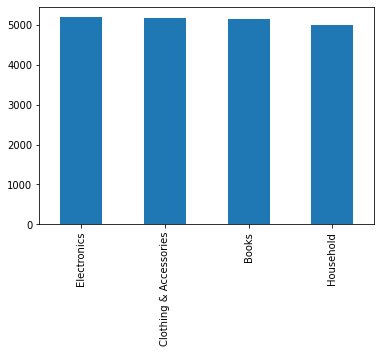

In [2]:
import pandas as pd

#Reading in csv file
df = pd.read_csv('ecommerceDataset.csv', encoding='latin-1')
df = df[['Product', 'Text']]
df.Text = df.Text.astype(str)
display(df)
print(df['Product'].value_counts().plot(kind='bar'))

The [dataset](https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification) I decided to use from Kaggle is the eCommerce Dataset that have 4 categories which covers almost 80% of all eCommerce products. I reduced the dataset down to about 20000 data for the sake of having enough RAM on Colab. The model should be able to predict the type of product being sold in the eCommerce through the given text.

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers, models, preprocessing

from sklearn.preprocessing import LabelEncoder
import numpy as np

# Set seed for reproducibility
np.random.seed(1234)

In [4]:
i = np.random.rand(len(df)) < 0.8
train = df[i]
test = df[~i]
print("Train data size: ", train.shape)
print("Test data size: ", test.shape)

Train data size:  (16407, 2)
Test data size:  (4092, 2)


In [5]:
# Set up X and Y
num_labels = 4
vocab_size = 25000
batch_size = 1000

# Fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.Text)

x_train = tokenizer.texts_to_matrix(train.Text, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.Text, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(train.Product)
y_train = encoder.transform(train.Product)
y_test = encoder.transform(test.Product)

y_train = tf.keras.utils.to_categorical(y_train, 4)
y_test = tf.keras.utils.to_categorical(y_test, 4)

# check shape
print("train shapes:", x_train.shape, y_train.shape)
print("test shapes:", x_test.shape, y_test.shape)


train shapes: (16407, 25000) (16407, 4)
test shapes: (4092, 25000) (4092, 4)


##Sequential

In [6]:
model = models.Sequential()
model.add(layers.Dense(32, input_dim=vocab_size, kernel_initializer='normal', 
                       activation='relu'))
model.add(layers.Dense(16, input_dim=vocab_size, kernel_initializer='normal', 
                       activation='sigmoid'))
model.add(layers.Dense(4, kernel_initializer='normal', activation='softmax'))
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)


Epoch 1/30
15/15 [==============================] - 4s 207ms/step - loss: 1.3689 - accuracy: 0.3792 - val_loss: 1.4373 - val_accuracy: 6.0938e-04
Epoch 2/30
15/15 [==============================] - 3s 184ms/step - loss: 1.2678 - accuracy: 0.5320 - val_loss: 1.4306 - val_accuracy: 0.1121
Epoch 3/30
15/15 [==============================] - 3s 187ms/step - loss: 1.1475 - accuracy: 0.7472 - val_loss: 1.3480 - val_accuracy: 0.5314
Epoch 4/30
15/15 [==============================] - 3s 189ms/step - loss: 1.0234 - accuracy: 0.9339 - val_loss: 1.2707 - val_accuracy: 0.6752
Epoch 5/30
15/15 [==============================] - 3s 181ms/step - loss: 0.8989 - accuracy: 0.9668 - val_loss: 1.1851 - val_accuracy: 0.7684
Epoch 6/30
15/15 [==============================] - 3s 204ms/step - loss: 0.7852 - accuracy: 0.9814 - val_loss: 1.0961 - val_accuracy: 0.8147
Epoch 7/30
15/15 [==============================] - 3s 178ms/step - loss: 0.6861 - accuracy: 0.9879 - val_loss: 1.0141 - val_accuracy: 0.8416
Ep

In [7]:
# Sequential evaluation of test data
result = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy is ', result[1])

5/5 [==============================] - 0s 59ms/step - loss: 0.1825 - accuracy: 0.9731
Accuracy is  0.9731183052062988


##CNN

In [9]:
model = models.Sequential()
model.add(layers.Embedding(4000, 64, input_length=25000)) 
model.add(layers.Conv1D(32, 4, activation='relu')) 
model.add(layers.MaxPooling1D(5)) 
model.add(layers.Conv1D(32, 4, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(4))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/5
103/103 [==============================] - 897s 9s/step - loss: 1.3212 - accuracy: 0.3701 - val_loss: 2.7081 - val_accuracy: 0.0000e+00
Epoch 2/5
103/103 [==============================] - 865s 8s/step - loss: 1.2336 - accuracy: 0.4569 - val_loss: 7.1658 - val_accuracy: 0.0000e+00
Epoch 3/5
103/103 [==============================] - 881s 9s/step - loss: 7.5681 - accuracy: 0.3259 - val_loss: 14.3069 - val_accuracy: 0.0000e+00
Epoch 4/5
103/103 [==============================] - 878s 9s/step - loss: 5.8099 - accuracy: 0.3038 - val_loss: 14.9149 - val_accuracy: 0.0000e+00
Epoch 5/5
103/103 [==============================] - 889s 9s/step - loss: 5.8148 - accuracy: 0.3038 - val_loss: 14.7971 - val_accuracy: 0.0000e+00


In [ ]:
# CNN evaluation of test data
result = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy is ', result[1])

##Embeddings

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(10000, 16, input_length=25000))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25000, 16)         160000    
                                                                 
 flatten_1 (Flatten)         (None, 400000)            0         
                                                                 
 dense_2 (Dense)             (None, 16)                6400016   
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 6,560,084
Trainable params: 6,560,084
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
411/411 [==============================] - 52s 127ms/step - loss: 1.3522 - accuracy: 0.3161 - val_loss: 1.7942 - val_accuracy: 0.0000e+00
Epoch 2/10
411/411 [=======

In [ ]:
# First embedding evaluation of test data
result = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy is ', result[1])

5/5 [==============================] - 4s 483ms/step - loss: 1.5674 - accuracy: 0.2463
Accuracy is  0.24633431434631348


In [ ]:
model = models.Sequential()
model.add(layers.Embedding(10000, 8, input_length=25000))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='sigmoid'))
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25000, 8)          80000     
                                                                 
 dense_3 (Dense)             (None, 25000, 32)         288       
                                                                 
 dense_4 (Dense)             (None, 25000, 16)         528       
                                                                 
 flatten_1 (Flatten)         (None, 400000)            0         
                                                                 
 dense_5 (Dense)             (None, 4)                 1600004   
                                                                 
Total params: 1,680,820
Trainable params: 1,680,820
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
462/462 [=========================

In [ ]:
# Second embedding evaluation of test data
result = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy is ', result[1])

##Analysis

For this Text Classification assignment, I attempted multiple approaches of classification on the same dataset that I downloaded from Kaggle. It had 50000 instances of text that describes a product and classifies them as either household, electronic, book, or clothing & accessories. Due to the dataset being too large for Colab, I have reduced it down to approximately 20000 for it to have a better chance of running. Despite this, I could not print the final accuracy for some approaches due to Colab hitting RAM limit and crashing itself.

The first model is a sequential model has 3 dense layers with output space going from 32, 16, 4 while using a different activation method including relu, sigmoid, and softmax. The overall accuracy for this model was 97.31% which is outstanding in term of performance for me. 

The second model is sequential model with CNN architecture. This model took the longest to run but also had a really low accuracy of 35.21%. It could possibly be due to CNN being typically used for image classification and not text classification that it might not have been a good fit. I also tried doing a RNN model but I could not get it to run in Colab at all as it crashes immediately everytime I ran. Thus, I could not get a comparison between RNN and CNN.

The next 2 models I used are both embedding attempts. The first one I flatten the output of the embedding layer and then ran 2 layers of dense afterward using activation relu and softmax respectively. It resulted in a low accuracy of 24.63% which is terrible in term of classification performance. Thus, for the second embedding attempt, I tried running 2 layers of dense on the output of embedding layer first before I flatten it and run another layer of dense. For each of the layer of dense, I ran a different activation method from relu to sigmoid to softmax. As a result, the accuracy of this second embedding attempt is 86.7% which is much better compared to my previous embedding attempt but is less effective at classification than the initial sequential model I did. Overall, half of my models performed well at text classification. However, I might have been able to improved the models further if I clean up and process the text prior to classification instead of training and testing immediately.